In [68]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression

In [69]:
df = pd.read_csv('data/placement-lr.csv')

In [70]:
X = df.iloc[:,0:1]
y = df.iloc[:,1]

In [71]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [72]:
lr = LinearRegression()

In [73]:
lr.fit(X_train,y_train)

LinearRegression()

In [74]:
y_pred = lr.predict(X_test)

In [75]:
print('MAE : ',mean_absolute_error(y_test,y_pred))

MAE :  0.2884710931878175


In [76]:
print('MAE : ',mean_squared_error(y_test,y_pred))

MAE :  0.12129235313495527


In [77]:
print('RMsSE : ',np.sqrt(mean_absolute_error(y_test,y_pred)))

RMsSE :  0.5370950504220063


In [78]:
print('R2 : ',r2_score(y_test,y_pred))

R2 :  0.780730147510384


In [79]:
# let's add random column to check r2 score increse or constant 

In [80]:
newdf = df.copy()
newdf['Random_features'] = np.random.random(200)

In [81]:
df.shape

(200, 2)

<Axes: xlabel='Random_features', ylabel='package'>

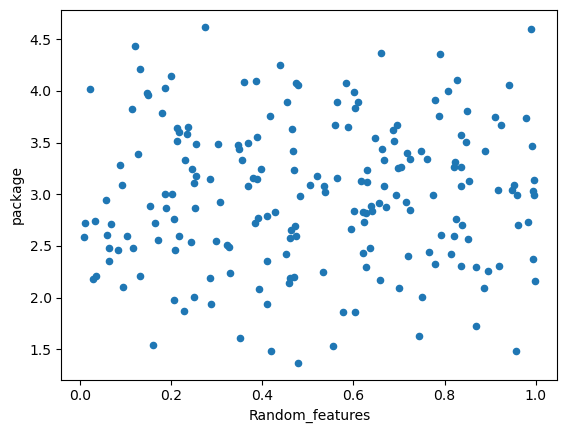

In [82]:
newdf.plot(kind='scatter',x='Random_features',y='package')

In [83]:
X = newdf[['Random_features','cgpa']]
y = newdf['package']

In [84]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

lr = LinearRegression()

lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)

print('R2 : ',r2_score(y_test,y_pred))

R2 :  0.7755394426425837


In [85]:
# let's calculate the adjacent r2 score
r2 = r2_score(y_test,y_pred)
n = newdf.shape[0]
k = newdf.shape[1]

r2_score_adj = 1 - ( ((1-r2)*(n-1) / (n - 1 - k) ))

print(r2_score_adj)

0.7721038218667049


In [86]:
# let's add important column 
newdf = df.copy()
newdf['iq'] = newdf['package'] + np.random.randint(1,10,200)/10

<Axes: xlabel='iq', ylabel='package'>

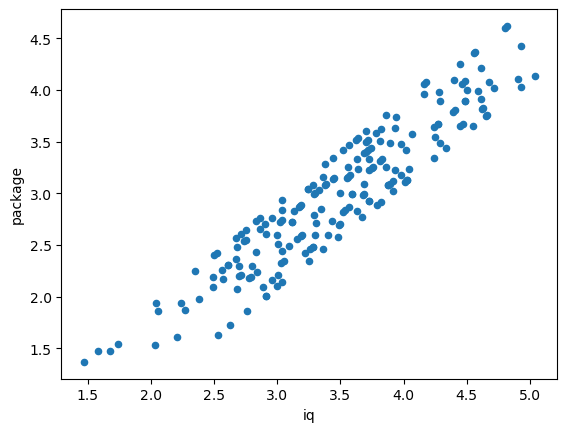

In [87]:
newdf.plot(kind='scatter',x='iq',y='package')

In [88]:
X = newdf[['iq','cgpa']]
y = newdf['package']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

lr = LinearRegression()

lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)

print('R2 : ',r2_score(y_test,y_pred))

R2 :  0.9077511301128238


In [89]:
# let's calculate the adjacent r2 score
r2 = r2_score(y_test,y_pred)
n = newdf.shape[0]
k = newdf.shape[1]

r2_score_adj = 1 - ( ((1-r2)*(n-1) / (n - 1 - k) ))

print(r2_score_adj)

0.9063391576145507
